In [1]:
# Standard data science imports
import numpy as np
import pandas as pd

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Statistics packages
import statsmodels.api as sm
import statistics
from scipy import stats
from scipy.stats import f_oneway

# Scikit-learn
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Ignore Warning Code
import warnings
warnings.filterwarnings('ignore')

In [2]:
file_path = "/Users/igmark/Desktop/WGU Data Files/churn_clean2.csv"
df = pd.read_csv(file_path)

In [3]:
df.info(file_path)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [4]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [5]:
df.isnull().sum()

CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMetho

In [6]:
# check for outliers and remove
print(df.shape)
df = df[(np.abs(stats.zscore(df.select_dtypes(include=np.number))) < 3).all(axis=1)]
print(df.shape)

(10000, 50)
(8950, 50)


array([[<AxesSubplot: title={'center': 'CaseOrder'}>,
        <AxesSubplot: title={'center': 'Zip'}>,
        <AxesSubplot: title={'center': 'Lat'}>,
        <AxesSubplot: title={'center': 'Lng'}>,
        <AxesSubplot: title={'center': 'Population'}>],
       [<AxesSubplot: title={'center': 'Children'}>,
        <AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'Income'}>,
        <AxesSubplot: title={'center': 'Outage_sec_perweek'}>,
        <AxesSubplot: title={'center': 'Email'}>],
       [<AxesSubplot: title={'center': 'Contacts'}>,
        <AxesSubplot: title={'center': 'Yearly_equip_failure'}>,
        <AxesSubplot: title={'center': 'Tenure'}>,
        <AxesSubplot: title={'center': 'MonthlyCharge'}>,
        <AxesSubplot: title={'center': 'Bandwidth_GB_Year'}>],
       [<AxesSubplot: title={'center': 'Item1'}>,
        <AxesSubplot: title={'center': 'Item2'}>,
        <AxesSubplot: title={'center': 'Item3'}>,
        <AxesSubplot: title={'center': '

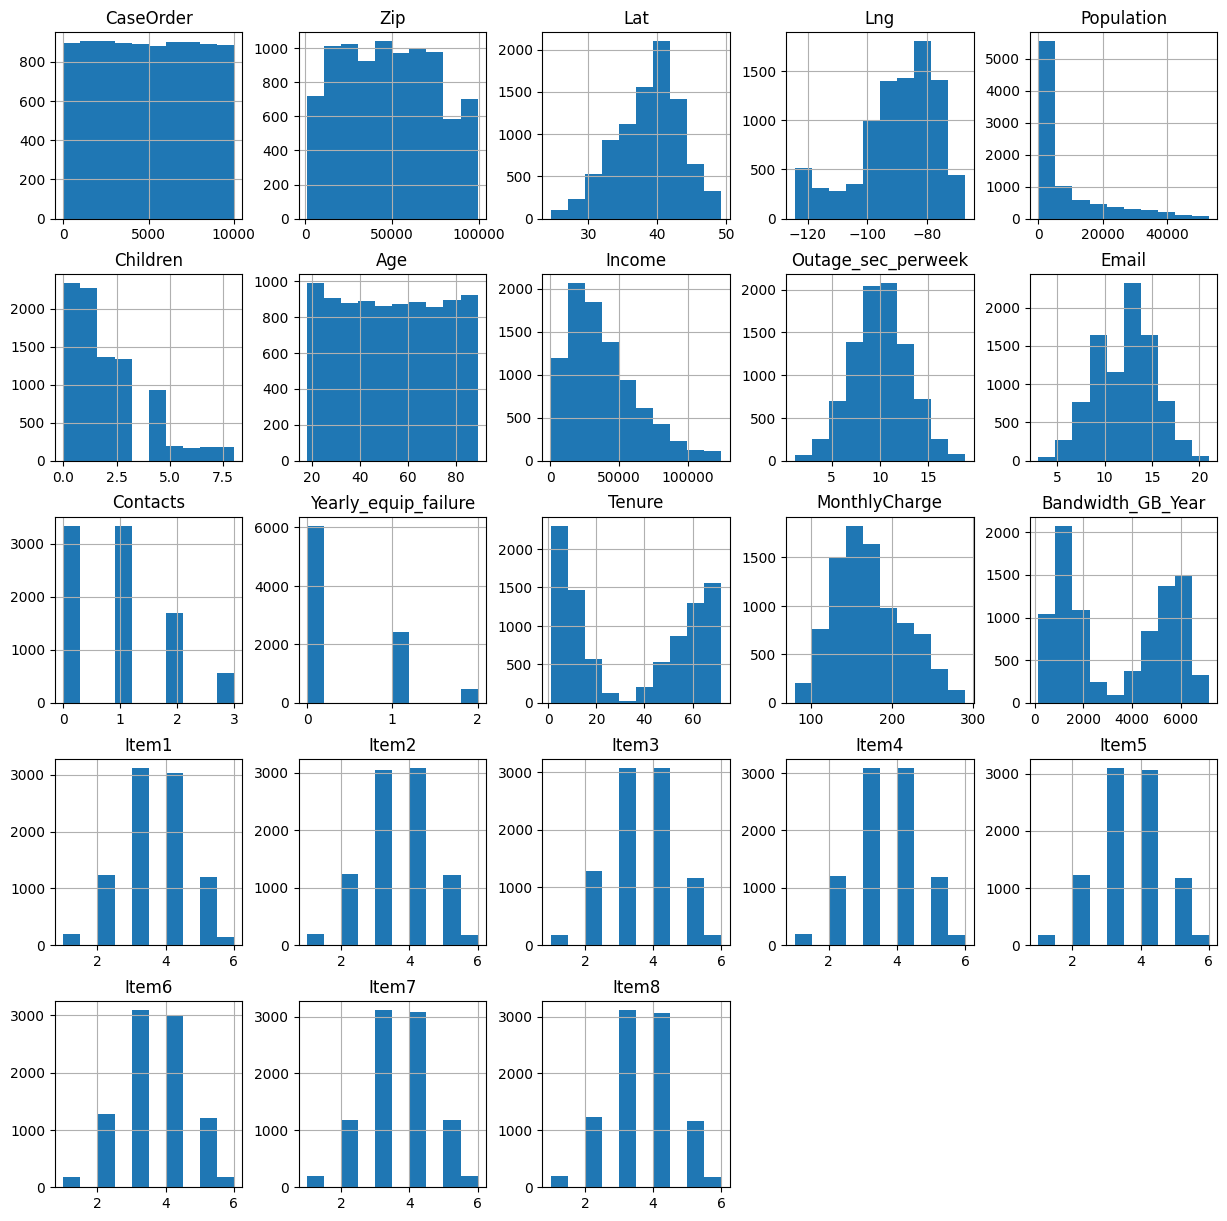

In [7]:
df.hist(figsize = (15,15))

In [8]:
#Drop the less meaningful columns

df = df.drop(columns=['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng',
                      'TimeZone', 'Job','Marital', 'Contract', 'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple',
                      'OnlineSecurity', 'OnlineBackup', 'Area','DeviceProtection', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
                      'PaymentMethod', 'Bandwidth_GB_Year', 'Item1', 'Item2', 
                      'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'])
                      

In [9]:
# Display the dimension of dataframe
df.shape

(8950, 14)

In [10]:
# display data set with all the columns
df.head() 

,Population,Children,Age,Income,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,TechSupport,Tenure,MonthlyCharge
1,10446,1,27,21704.77,Female,Yes,11.699080,12,0,1,Yes,No,1.156681,242.632554
2,3735,4,50,9609.57,Female,No,10.752800,9,0,1,Yes,No,15.754144,159.947583
3,13863,1,48,18925.23,Male,No,14.913540,15,2,0,Yes,No,17.087227,119.956840
4,11352,0,83,40074.19,Male,Yes,8.147417,16,2,1,No,Yes,1.670972,149.948316
5,17701,3,83,22660.20,Female,No,8.420993,15,3,1,No,No,7.000994,185.007692


In [11]:
df.describe()

,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,8508.409274,1.941453,53.161341,38329.400298,10.009065,12.021676,0.941676,0.374749,34.423473,172.783589
std,11759.988903,1.890668,20.634274,25123.528844,2.926500,3.011651,0.900798,0.582945,26.445276,42.990050
min,0.000000,0.000000,18.000000,348.670000,1.144796,3.000000,0.000000,0.000000,1.005104,79.978860
25%,727.250000,0.000000,35.000000,19041.117500,8.031398,10.000000,0.000000,0.000000,7.892645,139.979239
50%,2750.000000,1.000000,53.000000,32778.475000,10.016014,12.000000,1.000000,0.000000,29.772986,167.484705
75%,11838.750000,3.000000,71.000000,52280.437500,11.961618,14.000000,2.000000,1.000000,61.389790,202.443300
max,52967.000000,8.000000,89.000000,124025.100000,18.851730,21.000000,3.000000,2.000000,71.999280,290.160419


In [12]:
# Validate there are no nulls
df.isnull().sum()

Population              0
Children                0
Age                     0
Income                  0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
TechSupport             0
Tenure                  0
MonthlyCharge           0
dtype: int64

In [13]:
# Create dummy variables in order to encode categorical, yes/no data points into 1/0 numerical values.
df['DummyChurn'] = [1 if v == 'Yes' else 0 for v in df['Churn']]
df['DummyGender'] = [1 if v == 'Male' else 0 for v in df['Gender']]
df['DummyTechie'] = [1 if v == 'Yes' else 0 for v in df['Techie']]
df['DummyTechSupport'] = [1 if v == 'Yes' else 0 for v in df['TechSupport']]

In [14]:
# Drop original categorical features from dataframe
df = df.drop(columns=['Gender', 'Churn', 'Techie','TechSupport'])

array([[<AxesSubplot: title={'center': 'Population'}>,
        <AxesSubplot: title={'center': 'Children'}>,
        <AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'Income'}>],
       [<AxesSubplot: title={'center': 'Outage_sec_perweek'}>,
        <AxesSubplot: title={'center': 'Email'}>,
        <AxesSubplot: title={'center': 'Contacts'}>,
        <AxesSubplot: title={'center': 'Yearly_equip_failure'}>],
       [<AxesSubplot: title={'center': 'Tenure'}>,
        <AxesSubplot: title={'center': 'MonthlyCharge'}>,
        <AxesSubplot: title={'center': 'DummyChurn'}>,
        <AxesSubplot: title={'center': 'DummyGender'}>],
       [<AxesSubplot: title={'center': 'DummyTechie'}>,
        <AxesSubplot: title={'center': 'DummyTechSupport'}>,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

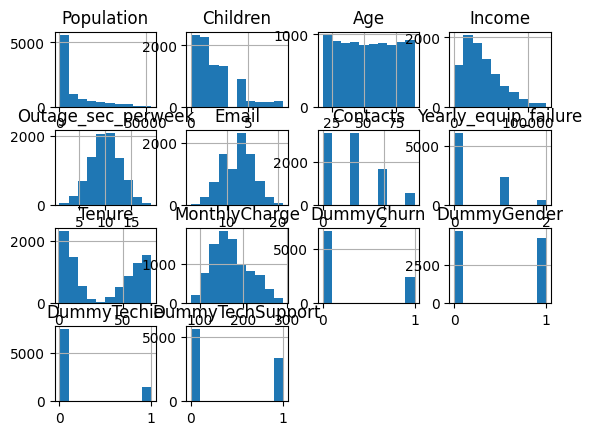

In [15]:
df.hist()

In [16]:
df.columns

Index(['Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek',
       'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge',
       'DummyChurn', 'DummyGender', 'DummyTechie', 'DummyTechSupport'],
      dtype='object')

In [17]:
df.nunique() 

Population              5414
Children                   9
Age                       72
Income                  8945
Outage_sec_perweek      8940
Email                     19
Contacts                   4
Yearly_equip_failure       3
Tenure                  8948
MonthlyCharge            748
DummyChurn                 2
DummyGender                2
DummyTechie                2
DummyTechSupport           2
dtype: int64

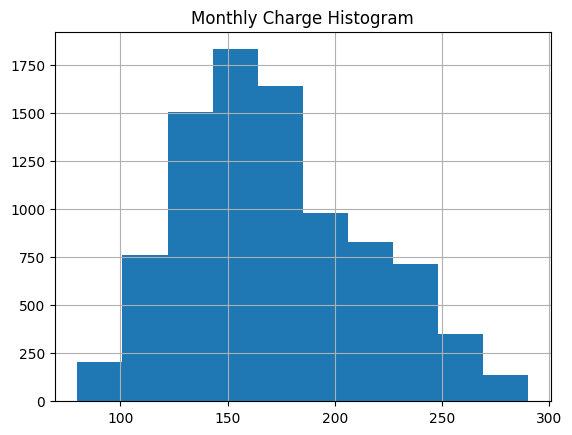

In [18]:
df['MonthlyCharge'].hist()
plt.title('Monthly Charge Histogram')
plt.show()


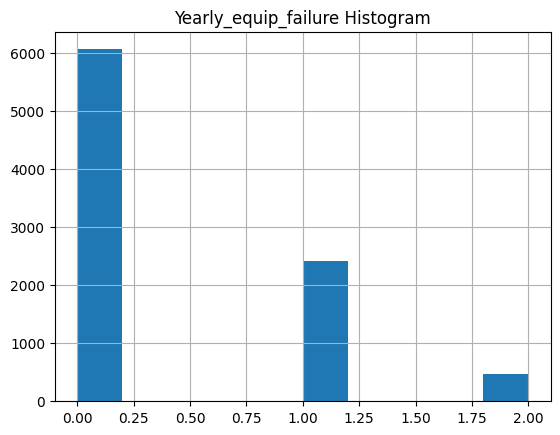

In [19]:
df['Yearly_equip_failure'].hist()
plt.title('Yearly_equip_failure Histogram')
plt.show()


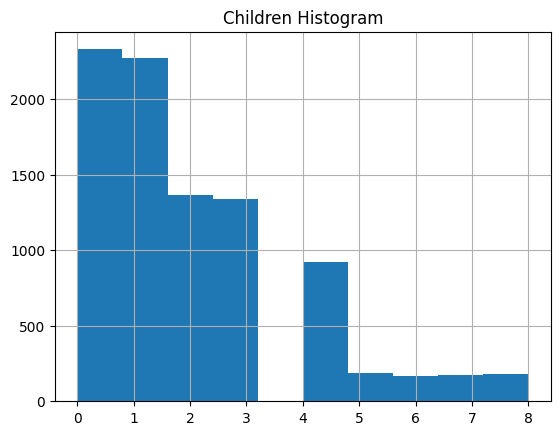

In [20]:
df['Children'].hist()
plt.title('Children Histogram')
plt.show()


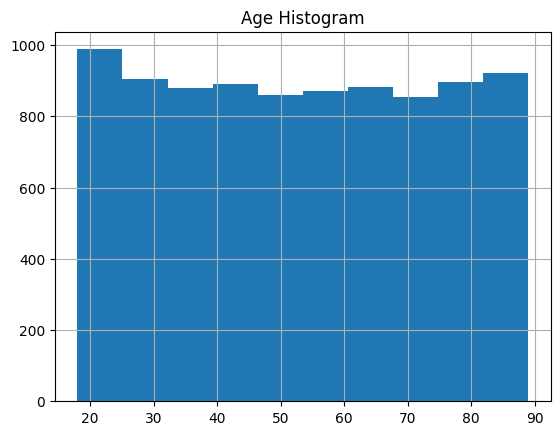

In [21]:
df['Age'].hist()
plt.title('Age Histogram')
plt.show()

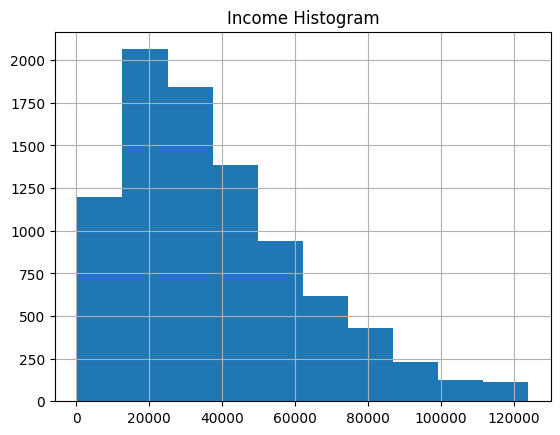

In [22]:
df['Income'].hist()
plt.title('Income Histogram')
plt.show()

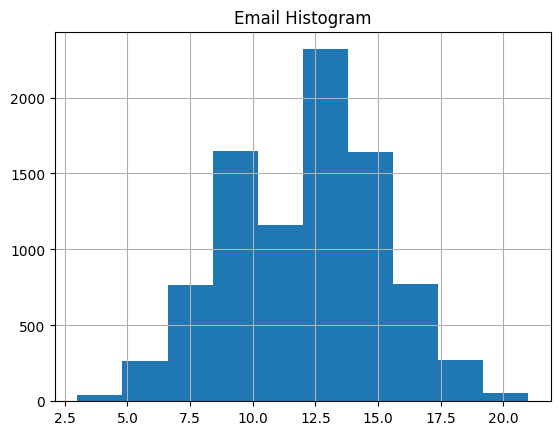

In [23]:
df['Email'].hist()
plt.title('Email Histogram')
plt.show()

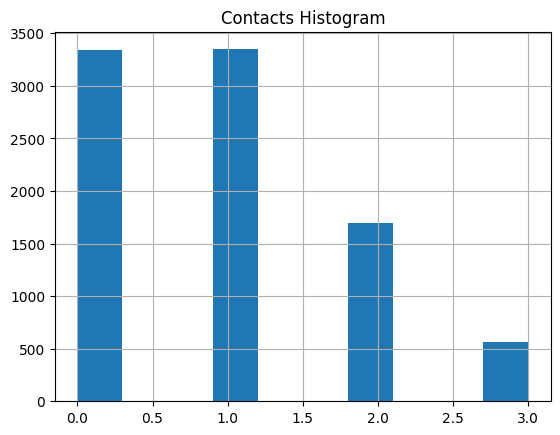

In [24]:
df['Contacts'].hist()
plt.title('Contacts Histogram')
plt.show()

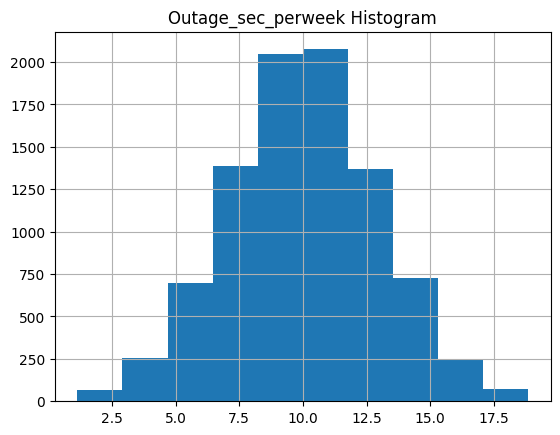

In [25]:
df['Outage_sec_perweek'].hist()
plt.title('Outage_sec_perweek Histogram')
plt.show()

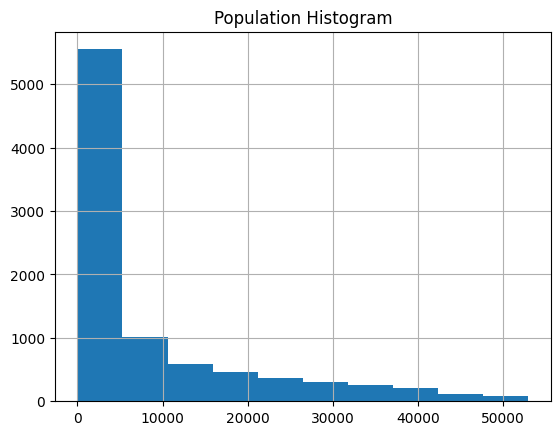

In [26]:
df['Population'].hist()
plt.title('Population Histogram')
plt.show()

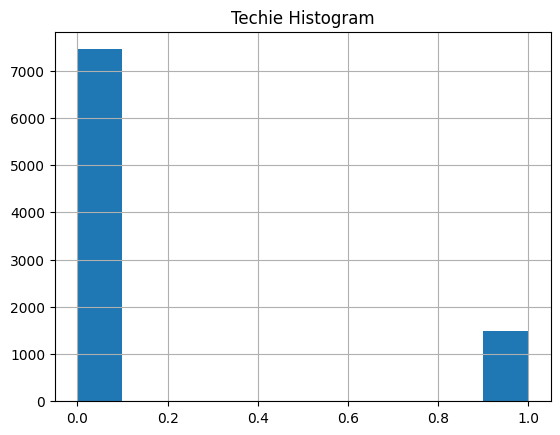

In [27]:
df['DummyTechie'].hist()
plt.title('Techie Histogram')
plt.show()

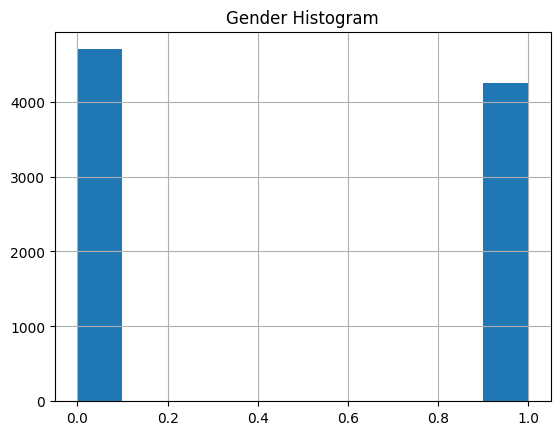

In [28]:
df['DummyGender'].hist()
plt.title('Gender Histogram')
plt.show()

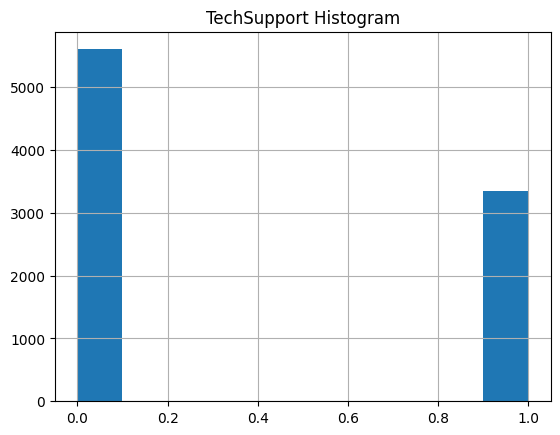

In [29]:
df['DummyTechSupport'].hist()
plt.title('TechSupport Histogram')
plt.show()

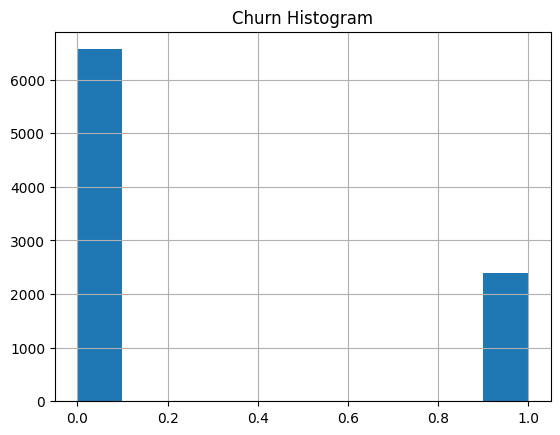

In [30]:
df['DummyChurn'].hist()
plt.title('Churn Histogram')
plt.show()

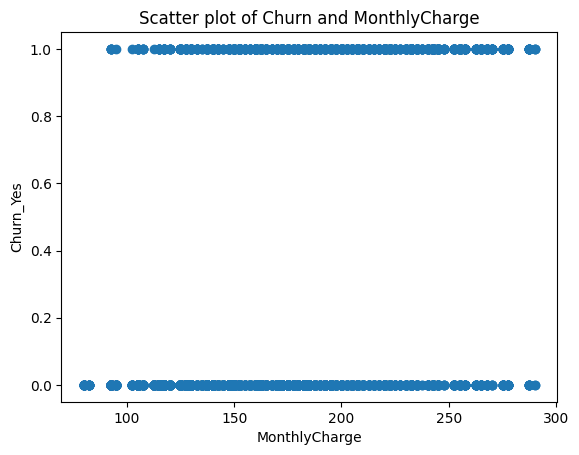

In [31]:
plt.scatter(df['MonthlyCharge'], df['DummyChurn'])
plt.xlabel('MonthlyCharge')
plt.ylabel('Churn_Yes')
plt.title('Scatter plot of Churn and MonthlyCharge')
plt.show()

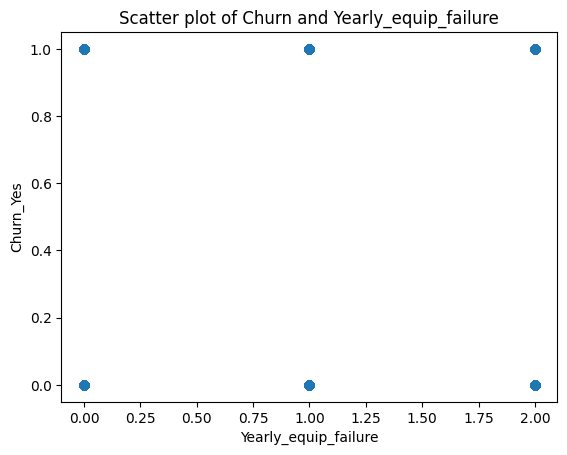

In [32]:
plt.scatter(df['Yearly_equip_failure'], df['DummyChurn'])
plt.xlabel('Yearly_equip_failure')
plt.ylabel('Churn_Yes')
plt.title('Scatter plot of Churn and Yearly_equip_failure')
plt.show()

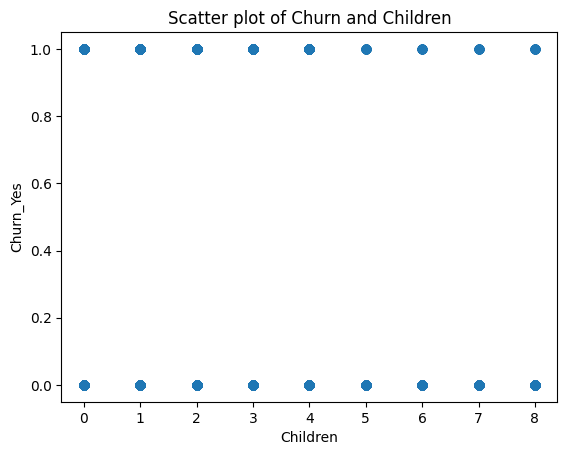

In [33]:
plt.scatter(df['Children'], df['DummyChurn'])
plt.xlabel('Children')
plt.ylabel('Churn_Yes')
plt.title('Scatter plot of Churn and Children')
plt.show()

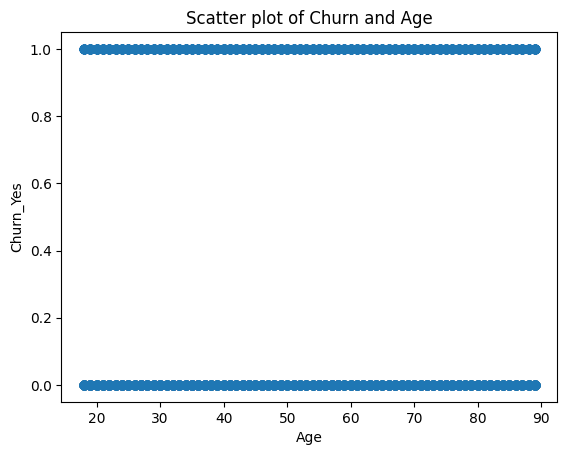

In [34]:
plt.scatter(df['Age'], df['DummyChurn'])
plt.xlabel('Age')
plt.ylabel('Churn_Yes')
plt.title('Scatter plot of Churn and Age')
plt.show()

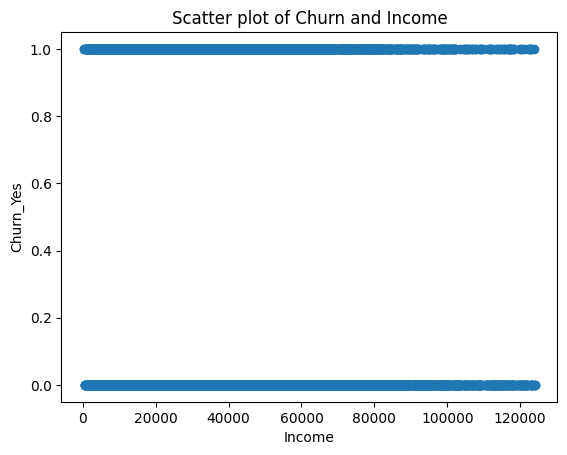

In [35]:
plt.scatter(df['Income'], df['DummyChurn'])
plt.xlabel('Income')
plt.ylabel('Churn_Yes')
plt.title('Scatter plot of Churn and Income')
plt.show()

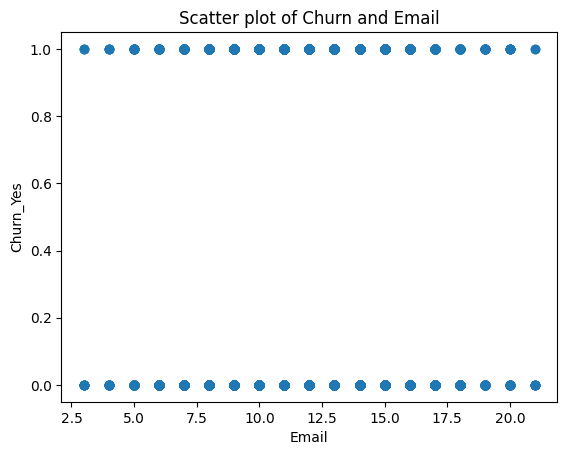

In [36]:
plt.scatter(df['Email'], df['DummyChurn'])
plt.xlabel('Email')
plt.ylabel('Churn_Yes')
plt.title('Scatter plot of Churn and Email')
plt.show()

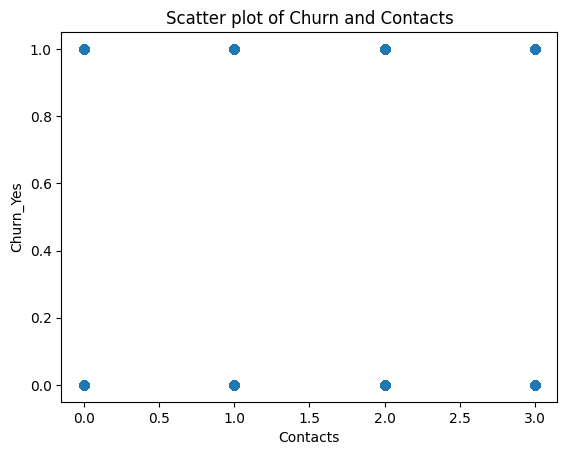

In [37]:
plt.scatter(df['Contacts'], df['DummyChurn'])
plt.xlabel('Contacts')
plt.ylabel('Churn_Yes')
plt.title('Scatter plot of Churn and Contacts')
plt.show()

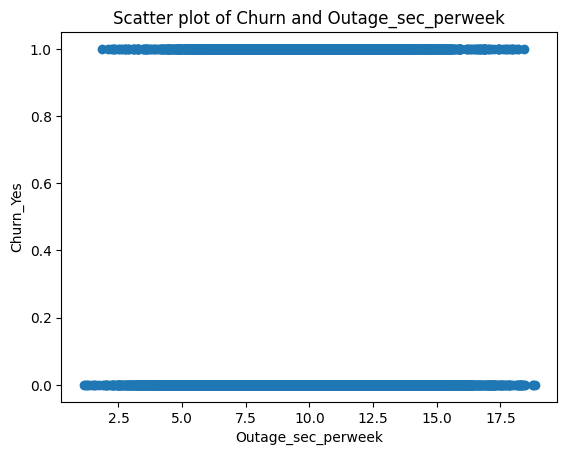

In [38]:
plt.scatter(df['Outage_sec_perweek'], df['DummyChurn'])
plt.xlabel('Outage_sec_perweek')
plt.ylabel('Churn_Yes')
plt.title('Scatter plot of Churn and Outage_sec_perweek')
plt.show()

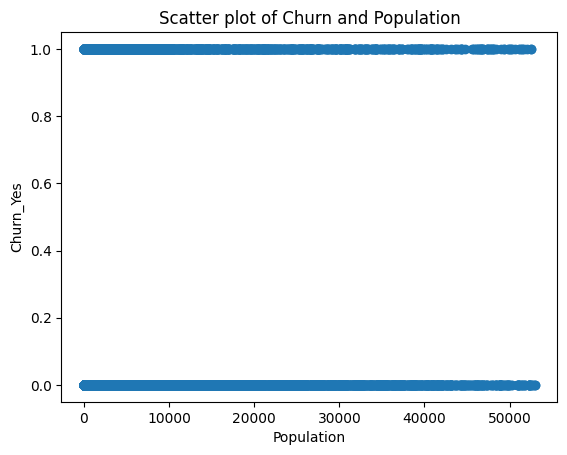

In [39]:
plt.scatter(df['Population'], df['DummyChurn'])
plt.xlabel('Population')
plt.ylabel('Churn_Yes')
plt.title('Scatter plot of Churn and Population')
plt.show()

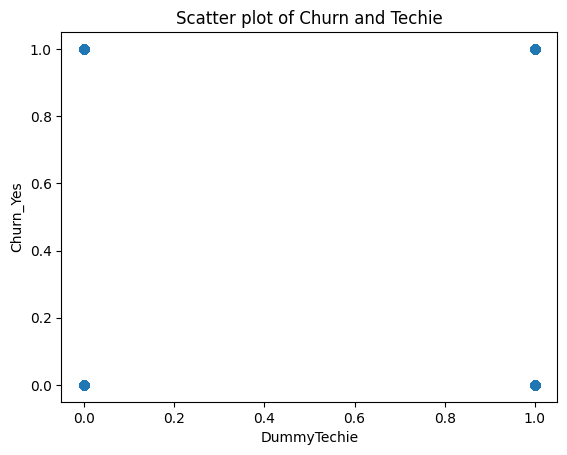

In [40]:
plt.scatter(df['DummyTechie'], df['DummyChurn'])
plt.xlabel('DummyTechie')
plt.ylabel('Churn_Yes')
plt.title('Scatter plot of Churn and Techie')
plt.show()

DummyTechie     0     1
DummyChurn             
0            5564  1000
1            1888   498
Chi-square test statistic:  39.49854080047015
p-value:  3.2830465020246013e-10


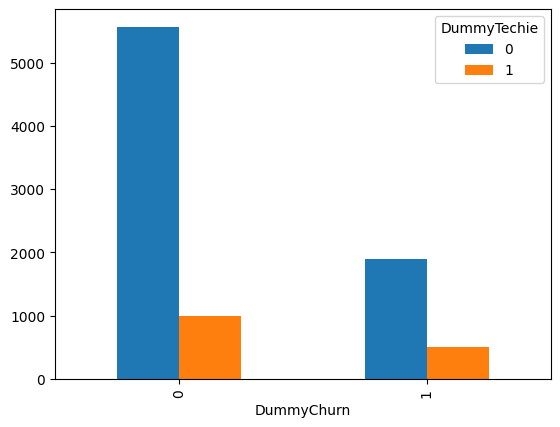

In [41]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['DummyChurn'], df['DummyTechie'])
chi2, pval, dof, expected = chi2_contingency(contingency_table)
print(contingency_table)
print('Chi-square test statistic: ', chi2)
print('p-value: ', pval)
contingency_table.plot(kind='bar')
plt.show()

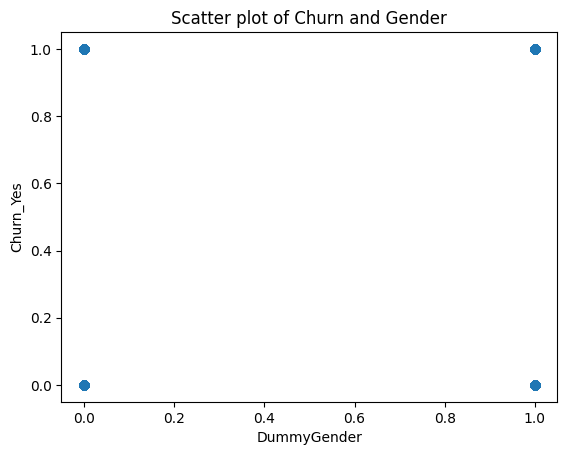

In [42]:
plt.scatter(df['DummyGender'], df['DummyChurn'])
plt.xlabel('DummyGender')
plt.ylabel('Churn_Yes')
plt.title('Scatter plot of Churn and Gender')
plt.show()

DummyGender     0     1
DummyChurn             
0            3505  3059
1            1195  1191
Chi-square test statistic:  7.572264705534119
p-value:  0.005927326108644943


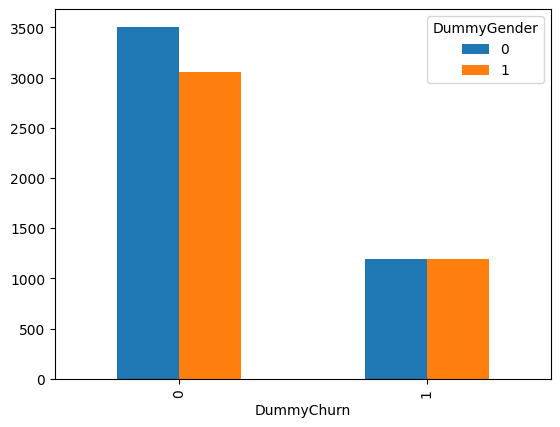

In [43]:
contingency_table = pd.crosstab(df['DummyChurn'], df['DummyGender'])
chi2, pval, dof, expected = chi2_contingency(contingency_table)
print(contingency_table)
print('Chi-square test statistic: ', chi2)
print('p-value: ', pval)
contingency_table.plot(kind='bar')
plt.show()

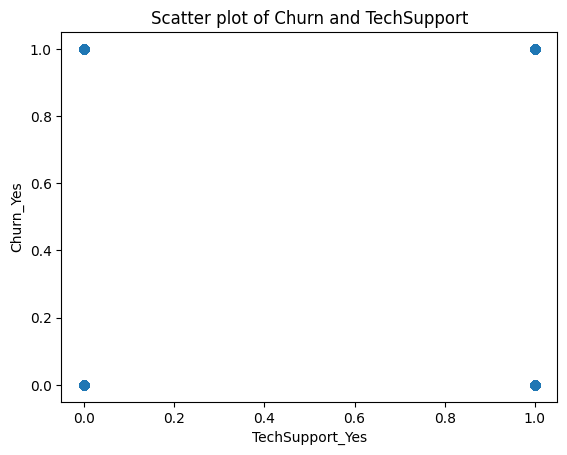

In [44]:
plt.scatter(df['DummyTechSupport'], df['DummyChurn'])
plt.xlabel('TechSupport_Yes')
plt.ylabel('Churn_Yes')
plt.title('Scatter plot of Churn and TechSupport')
plt.show()

DummyTechSupport     0     1
DummyChurn                  
0                 4151  2413
1                 1452   934
Chi-square test statistic:  4.14653152124283
p-value:  0.04171989902035993


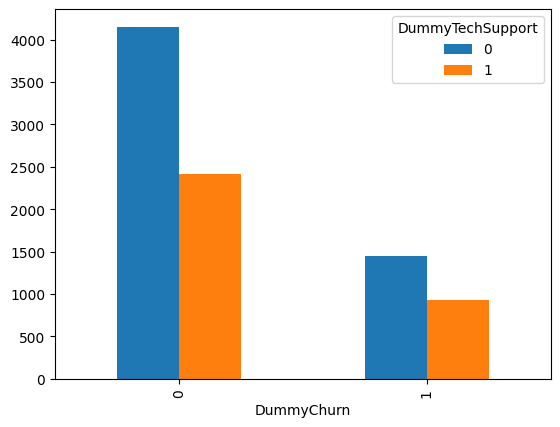

In [45]:
contingency_table = pd.crosstab(df['DummyChurn'], df['DummyTechSupport'])
chi2, pval, dof, expected = chi2_contingency(contingency_table)
print(contingency_table)
print('Chi-square test statistic: ', chi2)
print('p-value: ', pval)
contingency_table.plot(kind='bar')
plt.show()

In [60]:
# Prepared dataset saved to new file 
df.to_csv('prepared_churn_task2.csv', index=False)

In [47]:
# Construct an logistic regression model from all predictors that were identified in Part C2
df['intercept'] = 1
churn_logit = sm.Logit(df['DummyChurn'], df[['intercept','Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek',
       'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge',
       'DummyGender', 'DummyTechie', 'DummyTechSupport']])
results = churn_logit.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.337066
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             DummyChurn   No. Observations:                 8950
Model:                          Logit   Df Residuals:                     8936
Method:                           MLE   Df Model:                           13
Date:                Tue, 21 Mar 2023   Pseudo R-squ.:                  0.4187
Time:                        18:37:10   Log-Likelihood:                -3016.7
converged:                       True   LL-Null:                       -5189.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
intercept               -5.5314      0.264    -20.965      0.000      -6.049      -5.014
Population           -1.853e-06   2.76e-06     -0.672      0.501   -7.25e-06    3.55e-06
Children                -0.0046      0.017     -0.266      0.790      -0.038       0.029
Age                      0.0020      0.002      1.291      0.197      -0.001       0.005
Income                3.261e-07   1.28e-06      0.254      0.800   -2.19e-06    2.84e-06
Outage_sec_perweek      -0.0027      0.011     -0.247      0.805      -0.024       0.019
Email                    0.0082      0.011      0.761      0.447      -0.013       0.030
Contacts                 0.0293      0.036      0.818      0.413      -0.041       0.099
Yearly_equip_failure    -0.0094      0.055     -0.170      0.865      -0.118       0.099
Tenure                  -0.0755      0.002    -39.574      0.000      -0.079      -0.072
MonthlyCharge            0.0338      0.001     35.176      0.000       0.032       0.036
DummyGender              0.1914      0.065      2.960      0.003       0.065       0.318
DummyTechie              0.5733      0.084      6.847      0.000       0.409       0.737
DummyTechSupport        -0.2087      0.067     -3.118      0.002      -0.340      -0.078
========================================================================================
"""

The variables with p-values greater than 0.05 are Population, Children, Age, 
Income, Outage_sec_perweek, Email, Contacts, and Yearly_equip_failure

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Define the independent and dependent variables
X = df[['Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek',
       'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge',
       'DummyGender', 'DummyTechie', 'DummyTechSupport']]
y = df['DummyChurn']

# Fit a logistic regression model
model = sm.Logit(y, X).fit()

# Calculate VIFs for each independent variable
vifs = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the VIFs for each variable
for i, col in enumerate(X.columns):
    print(f'{col}: {vifs[i]:.2f}')
    
# Add a constant term to the independent variables
X = sm.add_constant(X)



Optimization terminated successfully.
         Current function value: 0.364938
         Iterations 7
Population: 1.52
Children: 2.02
Age: 6.81
Income: 3.18
Outage_sec_perweek: 10.31
Email: 12.38
Contacts: 2.06
Yearly_equip_failure: 1.40
Tenure: 2.61
MonthlyCharge: 13.09
DummyGender: 1.89
DummyTechie: 1.20
DummyTechSupport: 1.62


In [49]:
# Fit the initial model
df['intercept'] = 1
initial_model = sm.Logit(df['DummyChurn'], df[['intercept', 'Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'DummyGender', 'DummyTechie', 'DummyTechSupport']])
initial_results = initial_model.fit()

# Calculate the AIC
initial_aic = initial_results.aic
print("Initial model AIC:", initial_aic)

Optimization terminated successfully.
         Current function value: 0.337066
         Iterations 8
Initial model AIC: 6061.485297988196


In [50]:
df['intercept'] = 1
churn_logit = sm.Logit(df['DummyChurn'], df[['intercept', 'Tenure', 
       'DummyGender', 'DummyTechie', 'DummyTechSupport']])
results = churn_logit.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.440288
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             DummyChurn   No. Observations:                 8950
Model:                          Logit   Df Residuals:                     8945
Method:                           MLE   Df Model:                            4
Date:                Tue, 21 Mar 2023   Pseudo R-squ.:                  0.2407
Time:                        18:37:11   Log-Likelihood:                -3940.6
converged:                       True   LL-Null:                       -5189.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept            0.2229      0.052      4.309      0.000       0.122       0.324
Tenure              -0.0563      0.001    -38.731      0.000      -0.059      -0.053
DummyGender          0.1515      0.055      2.738      0.006       0.043       0.260
DummyTechie          0.4430      0.072      6.129      0.000       0.301       0.585
DummyTechSupport     0.1139      0.057      1.999      0.046       0.002       0.226
====================================================================================
"""

In [51]:
# Define the reduced model
X_reduced = df[['Tenure', 'DummyGender', 'DummyTechie', 'DummyTechSupport']]
y = df['DummyChurn']

# Fit the reduced model
X_reduced = sm.add_constant(X_reduced)
model_reduced = sm.Logit(y, X_reduced).fit()

# Compute the AIC for the reduced model
AIC_reduced = model_reduced.aic
print("AIC for the reduced model:", AIC_reduced)

Optimization terminated successfully.
         Current function value: 0.440288
         Iterations 7
AIC for the reduced model: 7891.159598437633


In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Define the logistic regression model
logreg = LogisticRegression()

# Define the independent and dependent variables
X = df[[ 'Tenure', 'DummyGender', 'DummyTechie', 'DummyTechSupport']]
y = df['DummyChurn']

# Perform cross-validation on the logistic regression model
scores = cross_val_score(logreg, X, y, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())


Cross-validation scores: [0.39497207 0.54972067 0.77374302 0.78044693 0.78547486]
Mean score: 0.6568715083798884


In [53]:
# Import the prepared dataset
matrix_df = pd.read_csv('prepared_churn.csv')
X = matrix_df.iloc[:, 1:-1].values
y = matrix_df.iloc[:, -1].values

In [54]:
# Split the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [55]:
# Training the Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [56]:
# Predict the Test set results
y_pred = classifier.predict(X_test)

In [57]:
# Display the Confusion Matrix
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[1113    0]
 [ 677    0]]


<AxesSubplot: >

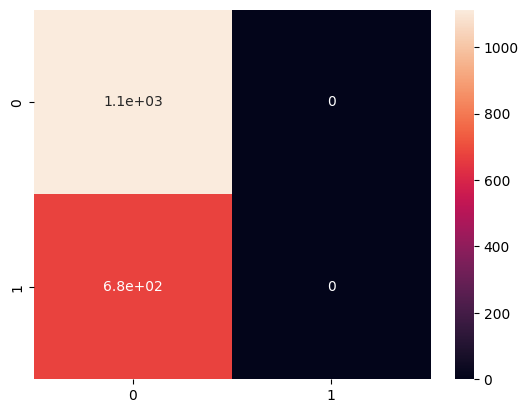

In [58]:
y_predict_test = classifier.predict(X_test)
matrix_new = confusion_matrix(y_test, y_predict_test)
sns.heatmap(matrix_new, annot=True)

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77      1113
           1       0.00      0.00      0.00       677

    accuracy                           0.62      1790
   macro avg       0.31      0.50      0.38      1790
weighted avg       0.39      0.62      0.48      1790

